# **MAI712** - Fundamentos em Ciência de Dados
___
#### **Professores:** Sergio Serra e Jorge Zavaleta
___
#### **Equipe:** Ingrid Pacheco, Eduardo Prata
___
### **OBJETIVO:**
Script de análise de artigos publicados em alguns eventos para o projeto final da matéria MAI712

#### **Imports e Bibliotecas**

Aqui estaremos declarando as bibliotecas e módulos necessários para nosso script:

* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [matplotlib](https://matplotlib.org/)
* [sklearn](https://scikit-learn.org/)
* [bokeh - versão 2.4.3](http://bokeh.org/)
* [plotly.express](https://pypi.org/project/plotly-express/)
* [seaborn](https://seaborn.pydata.org/)
* [prov](https://pypi.org/project/prov/)
* [IPython](https://ipython.org/install.html)

In [1]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import os
import urllib.request

!pip install bokeh==2.4.3
from bokeh.palettes import Category10  
from bokeh.plotting import figure, show            # paleta de cores
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

!pip install plotly-express
import plotly.express as px
!pip install seaborn
import seaborn as sns

import datetime
!pip install prov
from prov.model import ProvDocument
from prov.dot import prov_to_dot

!pip install ipython
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a9e87650df4a2301e8ce52d23ec52218f4e77728543c3e5c3364e29435927600
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.5 MB 391 kB/s 
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's

In [2]:
def create_dicts(article_data):
    topics_publisher_year = {}
    topics_year_publisher = {}
    topics_qty = {}
    articles_by_publisher = {}
    publisher_qty = {}
    topics_qty_year = {}
    publisher_qty_year = {}
    year_topics = {}

    for i,article in enumerate(article_data.values):
        print('qty: ' + str(i))
        print('artigo: ' + article[0])
        print('topics: ')
        topics = article[5]
        print(topics)
        publisher = article[4]
        year = article[7]
        if not pd.isna(publisher):
            if publisher not in publisher_qty_year:
                    publisher_qty_year[publisher] = {}
                    publisher_qty_year[publisher][year] = 1
            elif year not in publisher_qty_year[publisher]:
                    publisher_qty_year[publisher][year] = 1
            else:
                    publisher_qty_year[publisher][year] += 1

        if not pd.isna(publisher) and not pd.isna(topics):
            for topic in topics.split(','):
                topic = topic.upper()

                if year not in year_topics:
                    year_topics[year] = {}
                    year_topics[year][topic] = 1
                elif topic in year_topics[year]:
                    year_topics[year][topic] += 1
                else:
                    year_topics[year][topic] = 1

                if topic not in topics_publisher_year:
                    topics_publisher_year[topic] = {}
                    topics_publisher_year[topic][publisher] = {}
                    topics_publisher_year[topic][publisher][year] = 1
                elif publisher in topics_publisher_year[topic]:
                    if year not in topics_publisher_year[topic][publisher]:
                        topics_publisher_year[topic][publisher][year] = 1
                    else:
                        topics_publisher_year[topic][publisher][year] += 1
                else:
                    topics_publisher_year[topic][publisher] = {}
                    topics_publisher_year[topic][publisher][year] = 1
                
                if topic not in topics_year_publisher:
                    topics_year_publisher[topic] = {}
                    topics_year_publisher[topic][year] = {}
                    topics_year_publisher[topic][year][publisher] = 1
                elif year in topics_year_publisher[topic]:
                    if publisher not in topics_year_publisher[topic][year]:
                        topics_year_publisher[topic][year][publisher] = 1
                    else:
                        topics_year_publisher[topic][year][publisher] += 1
                else:
                    topics_year_publisher[topic][year] = {}
                    topics_year_publisher[topic][year][publisher] = 1

                if topic not in topics_qty:
                    topics_qty[topic] = 1
                else:
                    topics_qty[topic] += 1

                if topic not in topics_qty_year:
                    topics_qty_year[topic] = {}
                    topics_qty_year[topic][year] = 1
                else:
                    if year not in topics_qty_year[topic]:
                        topics_qty_year[topic][year] = 1
                    else:
                        topics_qty_year[topic][year] += 1

                if publisher not in articles_by_publisher:
                    articles_by_publisher[publisher] = {}
                    articles_by_publisher[publisher][year] = {}
                    articles_by_publisher[publisher][year][topic] = 1
                elif year in articles_by_publisher[publisher]:
                    if topic not in articles_by_publisher[publisher][year]:
                        articles_by_publisher[publisher][year][topic] = 1
                    else:
                        articles_by_publisher[publisher][year][topic] += 1
                else:
                    articles_by_publisher[publisher][year] = {}
                    articles_by_publisher[publisher][year][topic] = 1

                if publisher not in publisher_qty:
                    publisher_qty[publisher] = {}
                    publisher_qty[publisher][topic] = 1
                elif topic not in publisher_qty[publisher]:
                    publisher_qty[publisher][topic] = 1
                else:
                    publisher_qty[publisher][topic] += 1
    
    return topics_publisher_year, topics_year_publisher, topics_qty, articles_by_publisher, publisher_qty, topics_qty_year, publisher_qty_year, year_topics

In [24]:
def analyse_topics(topics_publisher_year, biggest_topics, topics_year_publisher):
    for topic in biggest_topics:
        topic_name = topics_publisher_year[topic[0]]
        print(topic_name)
        topic_name_df = pd.DataFrame.from_dict(topic_name)
        topic_name_df = topic_name_df.replace(np.nan, 0)
        print(topic_name_df)
        # Get data from last year

        topic_name_last_year = topic_name_df.sort_index().tail(1)
        last_year = topic_name_df.sort_index().tail(1).index.values[0]
        topic_name_last_year = topic_name_last_year.values[0]

        # topic_name_2022 = topic_name_df.sort_index().tail(1).values[0]
        print(topic_name_last_year)
        topic_name_df = topic_name_df.agg(['sum']) # Get total quantity for each conference in this topic
        print(topic_name_df)

        x_data = list(topic_name_df.columns)
        y_data = list(topic_name_df.values[0])
        print(x_data)
        print('------')
        print(y_data)

        comparison_dataframe = pd.DataFrame(data={'Publisher': x_data, 'Total': y_data, f'{last_year} Qty': topic_name_last_year})
        print(comparison_dataframe)

        data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

        p = figure(x_range=x_data,
                plot_width=1200,
                plot_height=520, 
                #toolbar_location=None, 
                title=f'Artigos publicados no topico {topic[0]}'
                )  # cria figura
        p.vbar(x='x_data', 
            top='y_data', 
            width=0.9, 
            source=data, 
            legend_field="x_data",
            line_color='white',
            fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
            )
        p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
        p.legend.location = "top_left"
        show(p)

        dentities[f'et-gridplot_published_articles_{topic[0]}'] = d1.entity(f'ufrj:gridplot_published_articles_{topic[0]}', {'prov:label': f'Plot dos artigos publicados no tópico {topic[0]}', 'prov:type': 'foaf:Document'})
        d1.wasGeneratedBy(dentities[f'et-gridplot_published_articles_{topic[0]}'], dactivities["at-analyse_topics"])

        #
        fig = px.bar(comparison_dataframe,
                    x=comparison_dataframe['Publisher'], 
                    y=comparison_dataframe[f'{last_year} Qty'],
                    hover_data=['Total'], 
                    color='Total',
                    labels={'Publisher':'Publishers'}, #height=400
                    )
        fig.update_layout(title_text=f'Artigos publicados no tópico {topic[0]} em {last_year}')
        fig.update_xaxes(tickangle=-45) 
        fig.show()

        dentities[f'et-gridplot_published_articles_{topic[0]}_{last_year}'] = d1.entity(f'ufrj:gridplot_published_articles_{topic[0]}_{last_year}', {'prov:label': f'Plot dos artigos publicados no tópico {topic[0]} em {last_year}', 'prov:type': 'foaf:Document'})
        d1.wasGeneratedBy(dentities[f'et-gridplot_published_articles_{topic[0]}_{last_year}'], dactivities["at-analyse_topics"])

        topics_data = []
        for year in topics_year_publisher[topic[0]].keys():
            cur_data = []
            for publisher in topics_publisher_year[topic[0]].keys():
                if publisher in topics_year_publisher[topic[0]][year]:
                    cur_data = [year,publisher,topics_year_publisher[topic[0]][year][publisher]]
                    topics_data.append(cur_data)

        print(topics_data)

        topics_data_df = pd.DataFrame(topics_data, columns=['Year', 'Publisher', 'Qty'])

        sns.set_theme()
        sns.relplot(data=topics_data_df, x="Year", y="Qty",
                    hue="Publisher", style="Publisher", size="Qty")
        plt.show()

        dentities[f'et-histogram_published_articles_{topic[0]}_publisher_year'] = d1.entity(f'ufrj:histogram_published_articles_{topic[0]}_publisher_year', {'prov:label': f'Histograma dos artigos publicados no tópico {topic[0]} por conferência e ano', 'prov:type': 'foaf:Document'})
        d1.wasGeneratedBy(dentities[f'et-histogram_published_articles_{topic[0]}_publisher_year'], dactivities["at-analyse_topics"])

In [18]:
def analyse_biggest_topics(biggest_topics, topics_qty_year):
    colors = ['orange','green','blue','red','purple','black']
    p1 = figure(title="Quantidade de artigos por tópico por ano")
    p2 = figure(title="Quantidade total de artigos por tópico")

    for i,topic in enumerate(biggest_topics):
        total_years = []
        topic_qty = dict(sorted(topics_qty_year[topic[0]].items()))

        # dentities[f'et-sorted_topics_{topic}_qty'] = d1.entity(f'ufrj:sorted_topics_{topic}_qty', {'prov:label': f'Quantidade ordenada de artigos publicados do tópico {topic} por conferência por ano', 'prov:type': 'foaf:Document'})
        # d1.wasDerivedFrom(dentities[f'et-sorted_topics_{topic}_qty'], dentities['et-topics_qty_year'])

        for year in topic_qty.keys():
            if len(total_years) == 0:
                total_years.append(topic_qty[year])
            else:
                total_years.append(topic_qty[year] + total_years[len(total_years) - 1])
        
        # dentities[f'et-total_years_{topic}'] = d1.entity(f'ufrj:total_years_{topic}', {'prov:label': f'Quantidade total de artigos publicados no tópico {topic} por ano', 'prov:type': 'foaf:Document'})
        # d1.wasDerivedFrom(dentities[f'et-total_years_{topic}'], dentities['et-sorted_topics_{topic}_qty'])

        # d1.used(dactivities["at-plot_topics"], dentities[f'et-total_years_{topic}'])
        # d1.used(dactivities["at-plot_topics"], dentities[f'et-sorted_topics_{topic}_qty'])

        p1.line(list(topic_qty.keys()), list(topic_qty.values()), legend_label=f"{topic[0]}", line_color=colors[i], line_dash=(4, 4),line_width=2)
        p2.line(list(topic_qty.keys()), list(total_years), legend_label=f"{topic[0]}", line_color=colors[i], line_dash=(4, 4),line_width=2)
    p2.legend.location = "bottom_right"
    show(gridplot([p1, p2], ncols=2, width=600, height=400))

    dentities[f'et-gridplot_topics'] = d1.entity(f'ufrj:gridplot_topics', {'prov:label': f'Plot com artigos publicados por tópico', 'prov:type': 'foaf:Document'}) 

In [19]:
def analyse_most_published_events(publisher_qty_year, publisher_qty_df_total):
    x_data = list(publisher_qty_df_total.columns)
    y_data = list(publisher_qty_df_total.values[0])
    print(y_data)

    data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))

    p = figure(x_range=x_data,
            plot_width=1200,
            plot_height=520, 
            title=f"Artigos publicados nos eventos"
            )  # cria figura
    p.vbar(x='x_data', 
        top='y_data', 
        width=0.9, 
        source=data, 
        legend_field="x_data",
        line_color='white',
        fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
        )
    p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
    p.legend.location = "top_left"
    show(p)

    dentities['et-gridplot_published_articles_events'] = d1.entity('ufrj:gridplot_published_articles_events', {'prov:label': 'Plot dos artigos publicados nas conferências', 'prov:type': 'foaf:Document'})

    colors = ['orange','green','blue','red','purple','black','pink','yellow','brown','LightSeaGreen']
    p1 = figure(title="Quantidade de artigos por evento por ano")
    p2 = figure(title="Quantidade total de artigos por evento")
    for i,pub in enumerate(x_data):
        total_years = []
        pub_qty = dict(sorted(publisher_qty_year[pub].items()))
        for year in pub_qty.keys():
            if len(total_years) == 0:
                total_years.append(pub_qty[year])
            else:
                total_years.append(pub_qty[year] + total_years[len(total_years) - 1])
        p1.line(list(pub_qty.keys()), list(pub_qty.values()), legend_label=f"{pub}", line_color=colors[i], line_dash=(4, 4),line_width=2)
        p2.line(list(pub_qty.keys()), list(total_years), legend_label=f"{pub}", line_color=colors[i], line_dash=(4, 4),line_width=2)
    show(gridplot([p1, p2], ncols=2, width=1000, height=400))

    dentities['et-histogram_events'] = d1.entity('ufrj:histogram_events', {'prov:label': 'Histograma dos artigos publicados nas conferências por ano e total', 'prov:type': 'foaf:Document'})

In [6]:
def analyse_publishers(publisher_qty_df,topics_qty,articles_by_publisher):
    for event in publisher_qty_df.columns:
        # Sort events from quantity of published articles (most to least)
        sorted_df = publisher_qty_df.sort_values(by=event, ascending=False)
        sorted_df = sorted_df[event].head(6)
        # print(sorted_df)

        total_topic = []
        big_qty_topic = sorted_df.index.to_list()
        # print(topics_qty)
        for topic in big_qty_topic:
            total_topic.append(topics_qty[topic])

        d = {'Topic': big_qty_topic, 'Total': total_topic, f'{event} Qty': list(sorted_df.values)}
        print(d)
        comparison_dataframe = pd.DataFrame(data=d)
        print(comparison_dataframe)

        fig = px.bar(comparison_dataframe,
                    x=comparison_dataframe['Topic'], 
                    y=comparison_dataframe[f'{event} Qty'],
                    hover_data=['Total'], 
                    color='Total',
                    labels={'Topic':'Topic'}, #height=400
                    )
        fig.update_layout(title_text=f'Quantidade de publicacoes dos topicos no {event}')
        fig.update_xaxes(tickangle=-45) 
        fig.show()

        dentities[f'et-plot_topics_event_{event}'] = d1.entity(f'ufrj:plot_topics_event_{event}', {'prov:label': f'Plot das publicações dos tópicos no evento {event}', 'prov:type': 'foaf:Document'})
        d1.wasGeneratedBy(dentities[f'et-plot_topics_event_{event}'], dactivities["at-analyse_publishers"])

        publishing_data = []
        # topic ano qty
        for year in articles_by_publisher[event].keys():
            cur_data = []
            for topic in big_qty_topic:
                if topic in articles_by_publisher[event][year]:
                    cur_data = [year,topic,articles_by_publisher[event][year][topic]]
                    publishing_data.append(cur_data)

        print(publishing_data)

        publishing_data_df = pd.DataFrame(publishing_data, columns=['Year', 'Topic', 'Qty'])

        sns.set_theme()
        sns.relplot(data=publishing_data_df, x="Year", y="Qty",
                    hue="Topic", style="Topic", size="Qty")
        plt.show()

        dentities[f'et-histogram_topics_event_{event}'] = d1.entity(f'ufrj:histogram_topics_event_{event}', {'prov:label': f'Histograma das publicações dos tópicos no evento {event} ao longo dos anos', 'prov:type': 'foaf:Document'})
        d1.wasGeneratedBy(dentities[f'et-histogram_topics_event_{event}'], dactivities["at-analyse_publishers"])

In [7]:
# Find quantity of clusters
def calculate_wcss(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        #
    return wcss

In [25]:
# Perform clustering on each topic
def find_clusters(biggest_topics, publisher_qty, publisher_qty_df_total):

    # For each topic find the cluster
    for i,topic in enumerate(biggest_topics):
        topic = topic[0]
        print(topic)
        topic_events_qty = []

        start_time = datetime.datetime.now()
   
        # Find the quantity of articles published with this topic in this event
        for event in publisher_qty.keys():
            if topic in publisher_qty[event]:
                topic_events_qty.append(publisher_qty[event][topic])
            else:
                topic_events_qty.append(0)

        end_time = datetime.datetime.now()

        dentities[f'et-topic_events_qty_{topic}'] = d1.entity(f'ufrj:topic_events_qty_{topic}', {'prov:label': f'Lista da quantidade de artigos publicados no tópico {topic} em cada conferência', 'prov:type': 'foaf:Document'})
        dactivities[f'at-get_qty_topic_event_{topic}'] = d1.activity(f'ufrj:get_qty_topic_event_{topic}', start_time, end_time)
        d1.wasAssociatedWith(dactivities[f'at-get_qty_topic_event_{topic}'], dagnts["ag-aa-ipynb"])
        d1.used(dactivities[f'at-get_qty_topic_event_{topic}'], dentities['et-publisher_qty'])
        d1.wasGeneratedBy(dentities[f'et-topic_events_qty_{topic}'], dactivities[f'at-get_qty_topic_event_{topic}']) 

        # Create Dataframe with quantity of articles from topic in event and total quantity of articles in event
        event_topic = pd.DataFrame(data={'Event Topic': topic_events_qty, 'Event': publisher_qty_df_total.values[0]}, index=publisher_qty_df_total.columns)

        dentities[f'et-event_topic_{topic}'] = d1.entity(f'ufrj:event_topic_{topic}', {'prov:label': f'Dataframe com a quantidade de artigos do tópico {topic} no total e em cada conferência', 'prov:type': 'foaf:Document'})
        d1.wasDerivedFrom(dentities[f'et-topic_events_qty_{topic}'], dentities[f'et-event_topic_{topic}'])
        d1.wasDerivedFrom(dentities['et-publisher_qty_df_total'], dentities[f'et-event_topic_{topic}'])


        start_time = datetime.datetime.now()
        # Find quantity of clusters
        wcss = calculate_wcss(event_topic)

        end_time = datetime.datetime.now()

        dentities[f'et-wcss_{topic}'] = d1.entity(f'ufrj:wcss_{topic}', {'prov:label': f'Quantidade de clusters do tópico {topic}', 'prov:type': 'foaf:Document'})
        dactivities[f'at-calculate_wcss_{topic}'] = d1.activity(f'ufrj:calculate_wcss_{topic}', start_time, end_time)
        d1.wasAssociatedWith(dactivities[f'at-calculate_wcss_{topic}'], dagnts["ag-aa-ipynb"])
        d1.used(dactivities[f'at-calculate_wcss_{topic}'], dentities[f'et-event_topic_{topic}'])
        d1.wasGeneratedBy(dentities[f'et-wcss_{topic}'], dactivities[f'at-calculate_wcss_{topic}']) 

        fig = plt.figure(figsize=(6,4))
        plt.plot(range(1, 11), wcss, 'r', lw=2.0)
        plt.title('Método de Elbow')
        plt.xlabel('Número de clusters')
        plt.ylabel('WCSS')
        plt.grid()
        plt.show()

        # Initialize the clusters
        #sns.set()
        start_time = datetime.datetime.now()
        kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter=300, n_init = 10, random_state=0)
        #

        # Get values from Dataframe to plot clusters
        event_topic = event_topic.values
        
        y_kmeans = kmeans.fit_predict(event_topic)        # Adjust the clusters
        # figure
        cluster = plt.figure(figsize=(15,10))
        #
        plt.scatter(event_topic[y_kmeans == 0, 0], event_topic[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
        plt.scatter(event_topic[y_kmeans == 1, 0], event_topic[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
        plt.scatter(event_topic[y_kmeans == 2, 0], event_topic[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
        #
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c = 'black', label = 'Centroides')
        plt.title('Clusters de consumidores')
        plt.xlabel(f'Quantidade do tópico {topic}')
        plt.ylabel('Quantidade total')
        plt.legend()
        plt.show()

        end_time = datetime.datetime.now()

        dentities[f'et-cluster_image_{topic}'] = d1.entity(f'ufrj:cluster_image_{topic}', {'prov:label': f'Plot de clusters para {topic}', 'prov:type': 'foaf:Document'})
        dactivities[f'at-plot_image_{topic}'] = d1.activity(f'ufrj:plot_image_{topic}', start_time, end_time)
        d1.wasAssociatedWith(dactivities[f'at-plot_image_{topic}'], dagnts["ag-aa-ipynb"])
        d1.used(dactivities[f'at-plot_image_{topic}'], dentities[f'et-event_topic_{topic}'])
        d1.wasGeneratedBy(dentities[f'et-cluster_image_{topic}'], dactivities[f'at-plot_image_{topic}']) 

        cluster.savefig(f'cluster-{topic}.png')

In [9]:
def find_biggest6_per_year(year_topics):
    biggest_topics_year = {}

    for year in year_topics.keys():
        sorted_year_topics = dict(sorted(year_topics[year].items(), key=lambda item: item[1], reverse=True))
        biggest_topics_year[year] = list(sorted_year_topics.items())[0:6]

    print(biggest_topics_year)
    return biggest_topics_year

In [26]:
def main(article_data):

    start_time = datetime.datetime.now()
    topics_publisher_year, topics_year_publisher, topics_qty, articles_by_publisher, publisher_qty, topics_qty_year, publisher_qty_year, year_topics = create_dicts(article_data)
    end_time = datetime.datetime.now()

    dentities['et-topics_publisher_year'] = d1.entity('ufrj:topics_publisher_year', {'prov:label': 'Quantidade de artigos publicados por cada conferência em cada ano por tópico', 'prov:type': 'foaf:Document'})
    dentities['et-topics_year_publisher'] = d1.entity('ufrj:topics_year_publisher', {'prov:label': 'Quantidade de artigos publicados por cada ano em cada conferência por tópico', 'prov:type': 'foaf:Document'})
    dentities['et-topics_qty'] = d1.entity('ufrj:topics_qty', {'prov:label': 'Quantidade de artigos publicados de cada tópico', 'prov:type': 'foaf:Document'})
    dentities['et-articles_by_publisher'] = d1.entity('ufrj:articles_by_publisher', {'prov:label': 'Quantidade de artigos publicados por cada ano em cada tópico por conferência', 'prov:type': 'foaf:Document'})
    dentities['et-publisher_qty'] = d1.entity('ufrj:publisher_qty', {'prov:label': 'Quantidade de vezes que cada conferência publicou cada tópico', 'prov:type': 'foaf:Document'})
    dentities['et-topics_qty_year'] = d1.entity('ufrj:topics_qty_year', {'prov:label': 'Quantidade de vezes que cada tópico foi publicado em cada ano', 'prov:type': 'foaf:Document'})
    dentities['et-publisher_qty_year'] = d1.entity('ufrj:publisher_qty_year', {'prov:label': 'Quantidade de publicações de cada conferência por ano', 'prov:type': 'foaf:Document'})
    dentities['et-year_topics'] = d1.entity('ufrj:year_topics', {'prov:label': 'Quantidade de vezes que um tópico apareceu por ano', 'prov:type': 'foaf:Document'})

    dactivities["at-create_dicts"] = d1.activity("ufrj:create_dicts", start_time, end_time)
    d1.wasAssociatedWith(dactivities['at-create_dicts'], dagnts["ag-aa-ipynb"])
    d1.used(dactivities["at-create_dicts"], dentities['et-dataset'])
    d1.wasGeneratedBy(dentities['et-topics_publisher_year'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-topics_year_publisher'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-topics_qty'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-articles_by_publisher'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-publisher_qty'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-topics_qty_year'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-publisher_qty_year'], dactivities["at-create_dicts"])
    d1.wasGeneratedBy(dentities['et-year_topics'], dactivities["at-create_dicts"])
    
    # Sort topics by total quantity published
    topics_qty = dict(sorted(topics_qty.items(), key=lambda item: item[1], reverse=True))

    dentities['et-sorted_topics_qty'] = d1.entity('ufrj:sorted_topics_qty', {'prov:label': 'Quantidade ordenada de artigos publicados de cada tópico', 'prov:type': 'foaf:Document'})

    d1.wasDerivedFrom(dentities['et-sorted_topics_qty'], dentities['et-topics_qty'])

    # Get 6 biggest topics
    biggest_topics = list(topics_qty.items())[0:6]

    dentities['et-biggest_topics'] = d1.entity('ufrj:biggest_topics', {'prov:label': 'Lista com os 6 tópicos que mais apareceram nos artigos', 'prov:type': 'foaf:Document'})

    d1.wasDerivedFrom(dentities['et-biggest_topics'], dentities['et-sorted_topics_qty'])
    # print('Biggest Topics: ')
    # print(biggest_topics)

    start_time = datetime.datetime.now()
    biggest_topics_year = find_biggest6_per_year(year_topics)
    end_time = datetime.datetime.now()

    dactivities["at-find_biggest6_per_year"] = d1.activity("ufrj:find_biggest6_per_year", start_time, end_time)
    d1.wasAssociatedWith(dactivities['at-find_biggest6_per_year'], dagnts["ag-aa-ipynb"])
    dentities['et-biggest_topics_year'] = d1.entity('ufrj:biggest_topics_year', {'prov:label': 'Dicionário com as publicações dos 6 tópicos mais publicados por ano', 'prov:type': 'foaf:Document'})
    d1.used(dactivities["at-find_biggest6_per_year"], dentities['et-biggest_topics'])
    d1.wasGeneratedBy(dentities['et-biggest_topics_year'], dactivities["at-find_biggest6_per_year"])

    # Get events with biggest quantity of published articles
    publisher_qty_year_df = pd.DataFrame.from_dict(publisher_qty_year).replace(np.nan, 0)
    dentities['et-publisher_qty_year_df'] = d1.entity('ufrj:publisher_qty_year_df', {'prov:label': 'Dataframe com quantidade de publicações de cada conferência por ano', 'prov:type': 'foaf:Document'})
    d1.wasDerivedFrom(dentities['et-publisher_qty_year'], dentities['et-publisher_qty_year_df'])

    publisher_qty_df = pd.DataFrame.from_dict(publisher_qty).replace(np.nan, 0)
    dentities['et-publisher_qty_df'] = d1.entity('ufrj:publisher_qty_year_df', {'prov:label': 'Dataframe com quantidade de vezes que cada conferência publicou cada tópico', 'prov:type': 'foaf:Document'})
    d1.wasDerivedFrom(dentities['et-publisher_qty'], dentities['et-publisher_qty_df'])

    publisher_qty_df_total = publisher_qty_year_df.agg(['sum'])
    dentities['et-publisher_qty_df_total'] = d1.entity('ufrj:publisher_qty_df_total', {'prov:label': 'Soma da quantidade de publicações de cada conferência ', 'prov:type': 'foaf:Document'})
    d1.wasDerivedFrom(dentities['et-publisher_qty_year_df'], dentities['et-publisher_qty_df_total'])
    # print(publisher_qty_df_total)

    # Perform clustering on each topic
    find_clusters(biggest_topics, publisher_qty, publisher_qty_df_total)

    dactivities["at-analyse_topics"] = d1.activity("ufrj:analyse_topics")
    d1.wasAssociatedWith(dactivities['at-analyse_topics'], dagnts["ag-aa-ipynb"])
    analyse_topics(topics_publisher_year,biggest_topics,topics_year_publisher)

    d1.used(dactivities["at-analyse_topics"], dentities['et-topics_publisher_year'])
    d1.used(dactivities["at-analyse_topics"], dentities['et-biggest_topics'])
    d1.used(dactivities["at-analyse_topics"], dentities['et-topics_year_publisher'])

    start_time = datetime.datetime.now()
    analyse_biggest_topics(biggest_topics,topics_qty_year)
    end_time = datetime.datetime.now()

    dactivities["at-analyse_biggest_topics"] = d1.activity("ufrj:analyse_biggest_topics", start_time, end_time)
    d1.wasAssociatedWith(dactivities['at-analyse_biggest_topics'], dagnts["ag-aa-ipynb"])
    d1.used(dactivities["at-analyse_biggest_topics"], dentities['et-biggest_topics'])
    d1.used(dactivities["at-analyse_biggest_topics"], dentities['et-topics_qty_year'])
    d1.wasGeneratedBy(dentities['et-gridplot_topics'], dactivities["at-analyse_biggest_topics"])

    start_time = datetime.datetime.now()
    analyse_most_published_events(publisher_qty_year, publisher_qty_df_total)
    end_time = datetime.datetime.now()

    dactivities["at-analyse_most_published_events"] = d1.activity("ufrj:analyse_most_published_events", start_time, end_time)
    d1.wasAssociatedWith(dactivities['at-analyse_most_published_events'], dagnts["ag-aa-ipynb"])
    d1.used(dactivities["at-analyse_most_published_events"], dentities['et-publisher_qty_year'])
    d1.used(dactivities["at-analyse_most_published_events"], dentities['et-publisher_qty_df_total'])
    d1.wasGeneratedBy(dentities['et-gridplot_published_articles_events'], dactivities["at-analyse_most_published_events"])
    d1.wasGeneratedBy(dentities['et-histogram_events'], dactivities["at-analyse_most_published_events"])

    dactivities["at-analyse_publishers"] = d1.activity("ufrj:analyse_publishers")
    d1.wasAssociatedWith(dactivities['at-analyse_publishers'], dagnts["ag-aa-ipynb"])
    analyse_publishers(publisher_qty_df,topics_qty,articles_by_publisher)

    d1.used(dactivities["at-analyse_publishers"], dentities['et-publisher_qty_df'])
    d1.used(dactivities["at-analyse_publishers"], dentities['et-sorted_topics_qty'])
    d1.used(dactivities["at-analyse_publishers"], dentities['et-articles_by_publisher'])

In [11]:
def create_agents(d1,agents):
    agents["ag-ufrj"] = d1.agent("ufrj:UFRJ", {"prov:type":"prov:Organization", "foaf:name":"Universidade Federal do Rio de Janeiro"})
    agents["ag-ppgi"] = d1.agent("ufrj:PPGI", {"prov:type":"prov:Organization", "foaf:name":"Programa de Pós Graduação em Informática"})
    agents["ag-ppgi"].actedOnBehalfOf(agents["ag-ufrj"])
    agents["ag-mai712"] = d1.agent("ufrj:MAI712", {"prov:type":"prov:Organization", "foaf:name":"Disciplina de Fundamentos de Ciências de Dados"})
    agents["ag-mai712"].actedOnBehalfOf(agents["ag-ppgi"])
    agents["ag-grupo6"] = d1.agent("ufrj:GRUPO6", {"prov:type":"prov:Organization", "foaf:name":"Grupo 06 para o trabalho final"})
    agents["ag-grupo6"].actedOnBehalfOf(agents["ag-mai712"])
    agents["ag-aluno-ingrid"] = d1.agent("ufrj:Ingrid", {"prov:type":"foaf:Person", "foaf:name":"Ingrid Quintanilha Pacheco", "foaf:mbox":"ingrid.pacheco@dcc.ufrj.br"})
    agents["ag-aluno-ingrid"].actedOnBehalfOf(agents["ag-grupo6"])
    agents["ag-aluno-eduardo"] = d1.agent("ufrj:Eduardo", {"prov:type":"foaf:Person", "foaf:name":"Eduardo Prata", "foaf:mbox":"edu.prata@gmail.com"})
    agents["ag-aluno-eduardo"].actedOnBehalfOf(agents["ag-grupo6"])
    agents["ag-aa-ipynb"] = d1.agent("ufrj:articleAnalysis.ipynb", {"prov:type":"prov:SoftwareAgent", "foaf:name":"articleAnalysis.ipynb", "prov:label":"Notebook Python usado para análise dos artigos"})
    agents["ag-aa-ipynb"].actedOnBehalfOf(agents["ag-grupo6"])

A saída de streaming foi truncada nas últimas 5000 linhas.
topics: 
nan
qty: 1534
artigo: TransLoc: transparent indoor localization with uncertain human participation for instant delivery.
topics: 
nan
qty: 1535
artigo: Tunnel emitter: tunnel diode based low-power carrier emitters for backscatter tags.
topics: 
nan
qty: 1536
artigo: LMAC: efficient carrier-sense multiple access for LoRa.
topics: 
nan
qty: 1537
artigo: iCellSpeed: increasing cellular data speed with device-assisted cell selection.
topics: 
nan
qty: 1538
artigo: mmVib: micrometer-level vibration measurement with mmwave radar.
topics: 
nan
qty: 1539
artigo: Experience: towards automated customer issue resolution in cellular networks.
topics: 
nan
qty: 1540
artigo: Joltik: enabling energy-efficient "future-proof" analytics on low-power wide-area networks.
topics: 
nan
qty: 1541
artigo: Re-identification of mobile devices using real-time bidding advertising networks.
topics: 
nan
qty: 1542
artigo: FaceRevelio: a face livene

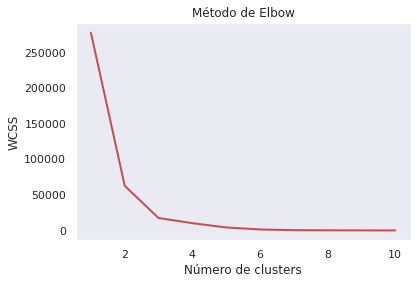

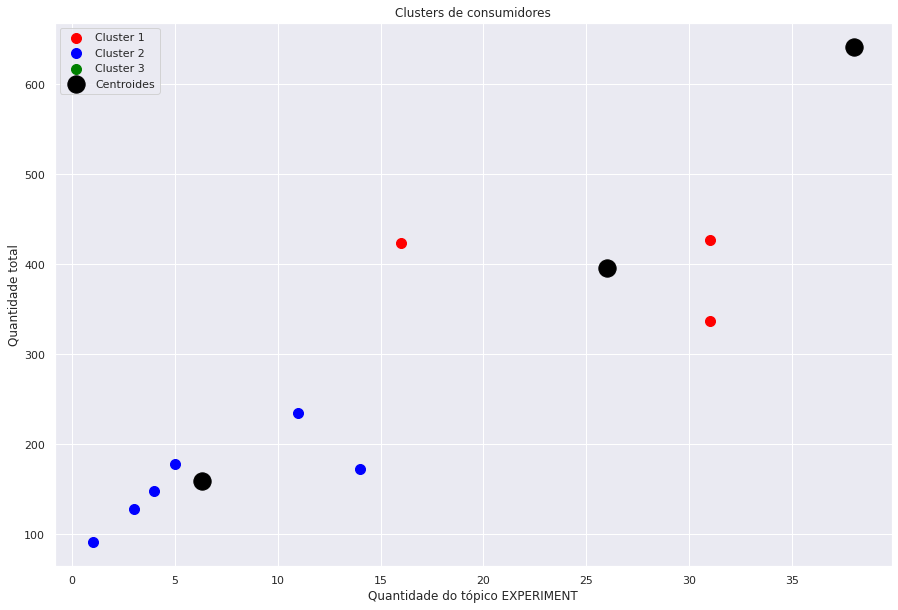

ALGORITHM


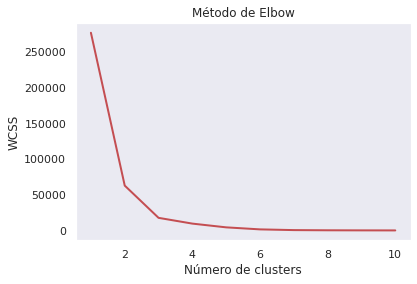

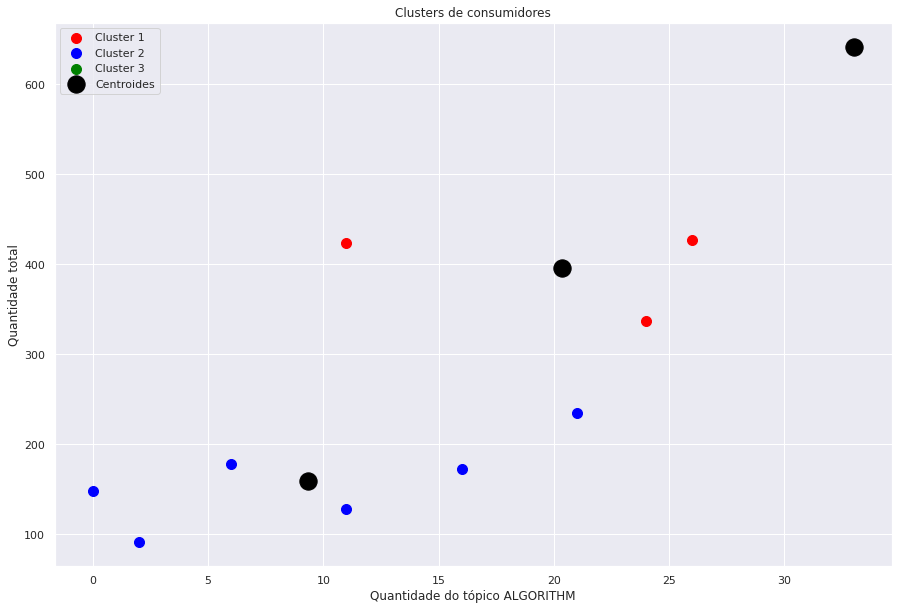

COMPUTER SCIENCE


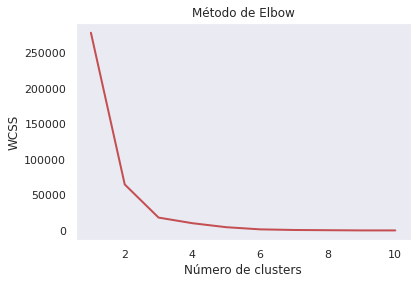

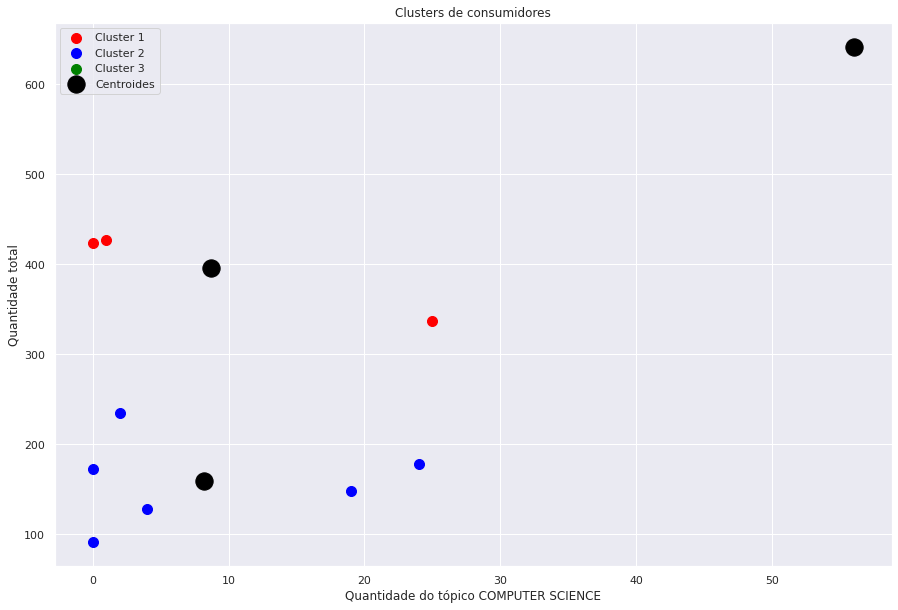

SENSOR


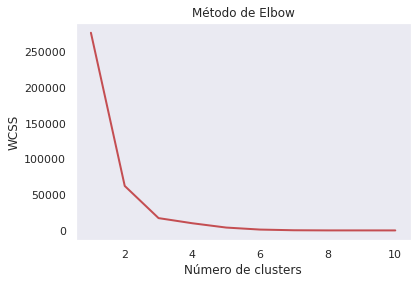

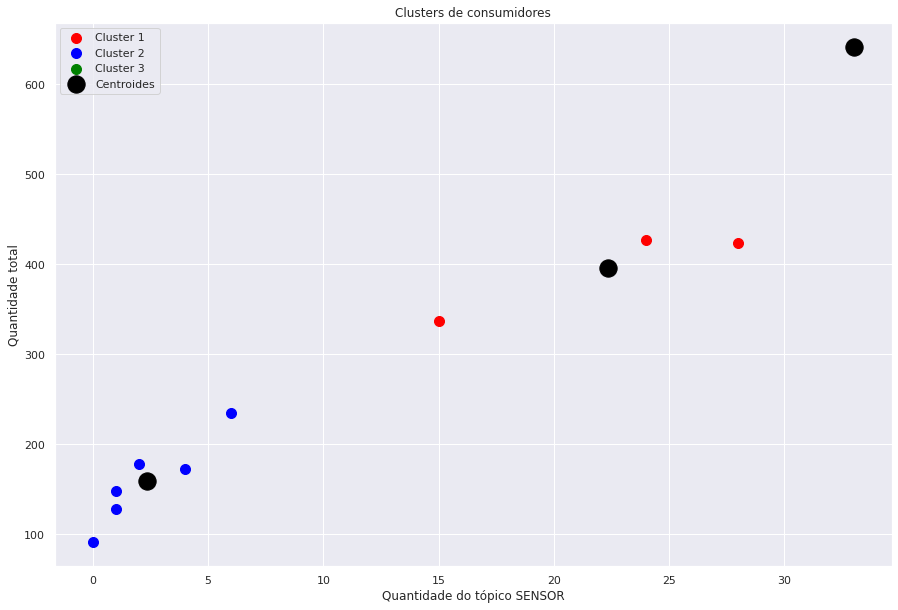

PROTOTYPE


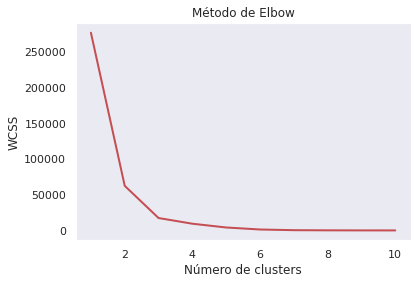

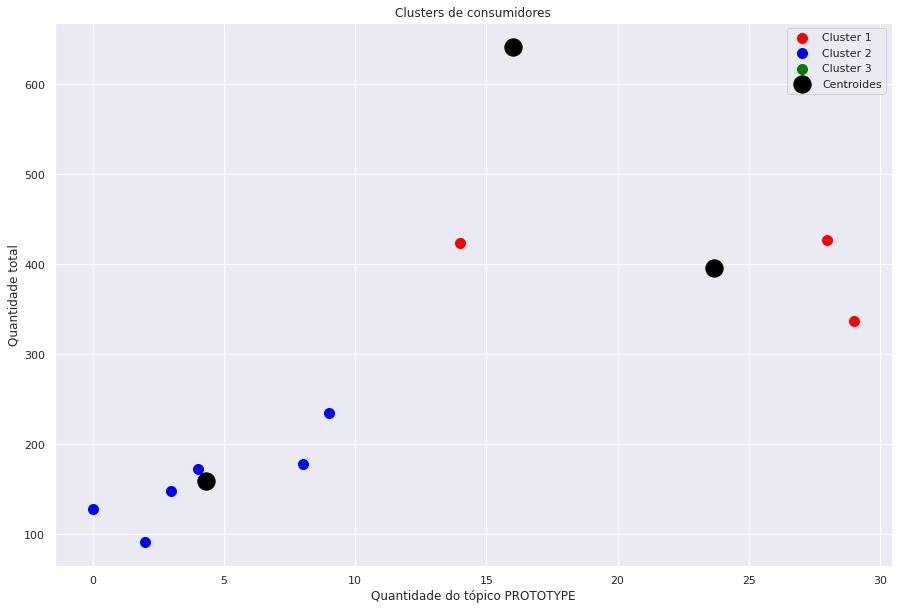

MACHINE LEARNING


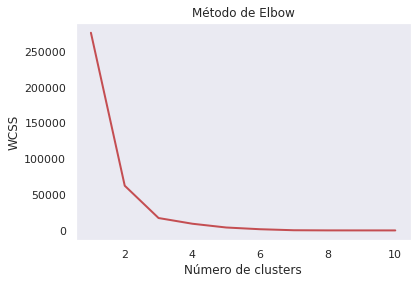

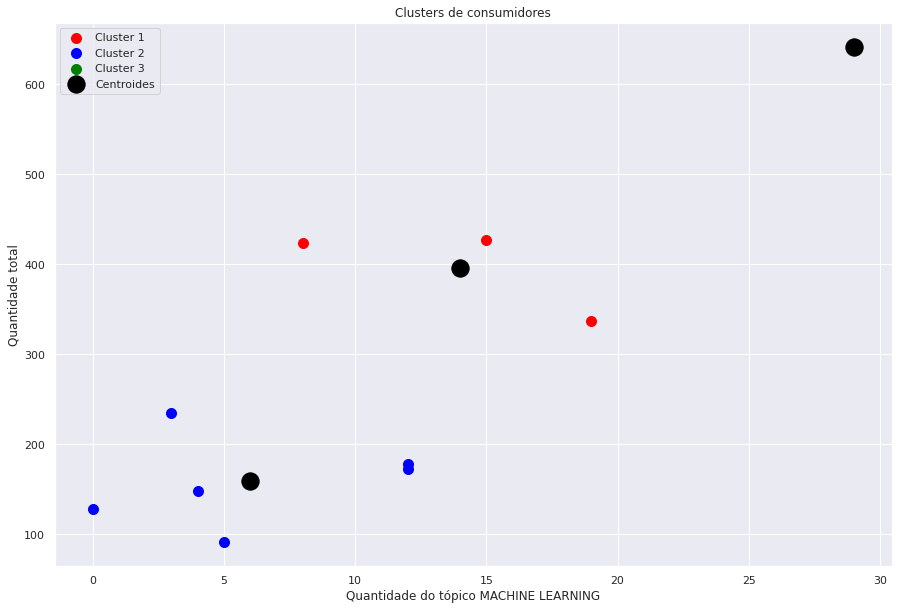

{'SOSP ': {2019: 1}, 'OSDI ': {2018: 4}, 'NDSS ': {2021: 2, 2020: 14, 2019: 10, 2018: 5}, 'MobiHoc ': {2019: 8, 2018: 6}, 'SIGCOMM ': {2022: 1, 2020: 3, 2019: 4, 2018: 3}, 'SenSys ': {2019: 4, 2018: 12}, 'MOBICOM ': {2020: 4, 2019: 13, 2018: 14}, 'CIDR ': {2020: 2, 2019: 3}, 'USENIX Security Symposium': {2020: 9, 2019: 16, 2018: 13}, 'EUROCRYPT ': {2020: 1, 2018: 2}}
      SOSP   OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
2019    1.0    0.0   10.0       8.0       4.0      4.0      13.0    3.0   
2018    0.0    4.0    5.0       6.0       3.0     12.0      14.0    0.0   
2021    0.0    0.0    2.0       0.0       0.0      0.0       0.0    0.0   
2020    0.0    0.0   14.0       0.0       3.0      0.0       4.0    2.0   
2022    0.0    0.0    0.0       0.0       1.0      0.0       0.0    0.0   

      USENIX Security Symposium  EUROCRYPT   
2019                       16.0         0.0  
2018                       13.0         2.0  
2021                        0.0         0

[[2019, 'SOSP ', 1], [2019, 'NDSS ', 10], [2019, 'MobiHoc ', 8], [2019, 'SIGCOMM ', 4], [2019, 'SenSys ', 4], [2019, 'MOBICOM ', 13], [2019, 'CIDR ', 3], [2019, 'USENIX Security Symposium', 16], [2018, 'OSDI ', 4], [2018, 'NDSS ', 5], [2018, 'MobiHoc ', 6], [2018, 'SIGCOMM ', 3], [2018, 'SenSys ', 12], [2018, 'MOBICOM ', 14], [2018, 'USENIX Security Symposium', 13], [2018, 'EUROCRYPT ', 2], [2021, 'NDSS ', 2], [2020, 'NDSS ', 14], [2020, 'SIGCOMM ', 3], [2020, 'MOBICOM ', 4], [2020, 'CIDR ', 2], [2020, 'USENIX Security Symposium', 9], [2020, 'EUROCRYPT ', 1], [2022, 'SIGCOMM ', 1]]


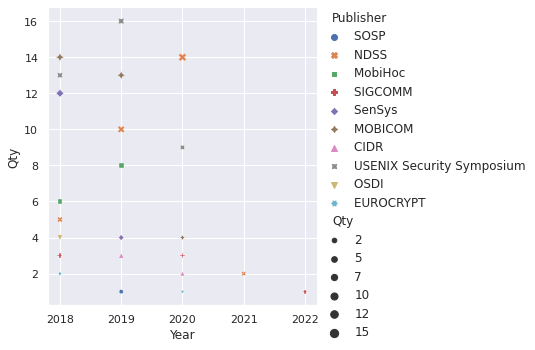

{'SOSP ': {2019: 2}, 'NDSS ': {2020: 12, 2019: 7, 2018: 5}, 'MobiHoc ': {2020: 2, 2019: 8, 2018: 6}, 'SIGCOMM ': {2022: 1, 2020: 5, 2019: 6, 2018: 9}, 'SenSys ': {2019: 6, 2018: 5}, 'MOBICOM ': {2020: 3, 2019: 14, 2018: 9}, 'CIDR ': {2020: 2, 2019: 4}, 'USENIX Security Symposium': {2020: 11, 2019: 15, 2018: 7}, 'EUROCRYPT ': {2021: 2, 2020: 2, 2019: 3, 2018: 4}}
      SOSP   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
2019    2.0    7.0       8.0       6.0      6.0      14.0    4.0   
2020    0.0   12.0       2.0       5.0      0.0       3.0    2.0   
2018    0.0    5.0       6.0       9.0      5.0       9.0    0.0   
2022    0.0    0.0       0.0       1.0      0.0       0.0    0.0   
2021    0.0    0.0       0.0       0.0      0.0       0.0    0.0   

      USENIX Security Symposium  EUROCRYPT   
2019                       15.0         3.0  
2020                       11.0         2.0  
2018                        7.0         4.0  
2022                        0.0         0.

[[2019, 'SOSP ', 2], [2019, 'NDSS ', 7], [2019, 'MobiHoc ', 8], [2019, 'SIGCOMM ', 6], [2019, 'SenSys ', 6], [2019, 'MOBICOM ', 14], [2019, 'CIDR ', 4], [2019, 'USENIX Security Symposium', 15], [2019, 'EUROCRYPT ', 3], [2020, 'NDSS ', 12], [2020, 'MobiHoc ', 2], [2020, 'SIGCOMM ', 5], [2020, 'MOBICOM ', 3], [2020, 'CIDR ', 2], [2020, 'USENIX Security Symposium', 11], [2020, 'EUROCRYPT ', 2], [2018, 'NDSS ', 5], [2018, 'MobiHoc ', 6], [2018, 'SIGCOMM ', 9], [2018, 'SenSys ', 5], [2018, 'MOBICOM ', 9], [2018, 'USENIX Security Symposium', 7], [2018, 'EUROCRYPT ', 4], [2022, 'SIGCOMM ', 1], [2021, 'EUROCRYPT ', 2]]


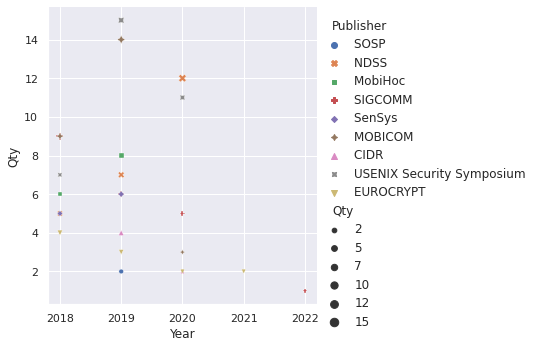

{'OSDI ': {2021: 2, 2020: 11, 2018: 6}, 'NDSS ': {2021: 4, 2020: 11, 2019: 6, 2018: 4}, 'SIGCOMM ': {2022: 1, 2019: 1}, 'MOBICOM ': {2018: 1}, 'CIDR ': {2022: 6, 2021: 9, 2020: 6, 2019: 3}, 'USENIX Security Symposium': {2021: 22, 2020: 13, 2019: 12, 2018: 9}, 'EUROCRYPT ': {2020: 1, 2019: 1, 2018: 2}}
      OSDI   NDSS   SIGCOMM   MOBICOM   CIDR   USENIX Security Symposium  \
2021    2.0    4.0       0.0       0.0    9.0                       22.0   
2020   11.0   11.0       0.0       0.0    6.0                       13.0   
2018    6.0    4.0       0.0       1.0    0.0                        9.0   
2019    0.0    6.0       1.0       0.0    3.0                       12.0   
2022    0.0    0.0       1.0       0.0    6.0                        0.0   

      EUROCRYPT   
2021         0.0  
2020         1.0  
2018         2.0  
2019         1.0  
2022         0.0  
[0. 0. 1. 0. 6. 0. 0.]
     OSDI   NDSS   SIGCOMM   MOBICOM   CIDR   USENIX Security Symposium  \
sum   19.0   25.0       2.0 

[[2021, 'OSDI ', 2], [2021, 'NDSS ', 4], [2021, 'CIDR ', 9], [2021, 'USENIX Security Symposium', 22], [2020, 'OSDI ', 11], [2020, 'NDSS ', 11], [2020, 'CIDR ', 6], [2020, 'USENIX Security Symposium', 13], [2020, 'EUROCRYPT ', 1], [2018, 'OSDI ', 6], [2018, 'NDSS ', 4], [2018, 'MOBICOM ', 1], [2018, 'USENIX Security Symposium', 9], [2018, 'EUROCRYPT ', 2], [2019, 'NDSS ', 6], [2019, 'SIGCOMM ', 1], [2019, 'CIDR ', 3], [2019, 'USENIX Security Symposium', 12], [2019, 'EUROCRYPT ', 1], [2022, 'SIGCOMM ', 1], [2022, 'CIDR ', 6]]


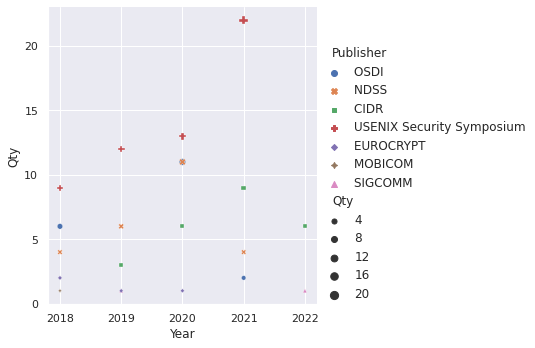

{'OSDI ': {2018: 1}, 'NDSS ': {2020: 6, 2019: 2, 2018: 7}, 'MobiHoc ': {2020: 1, 2019: 1, 2018: 2}, 'SIGCOMM ': {2022: 1, 2020: 1, 2019: 2, 2018: 2}, 'SenSys ': {2019: 13, 2018: 15}, 'MOBICOM ': {2020: 1, 2019: 8, 2018: 15}, 'CIDR ': {2020: 1, 2019: 1}, 'USENIX Security Symposium': {2021: 2, 2020: 9, 2019: 12, 2018: 10}, 'EUROCRYPT ': {2021: 1}}
      OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
2018    1.0    7.0       2.0       2.0     15.0      15.0    0.0   
2020    0.0    6.0       1.0       1.0      0.0       1.0    1.0   
2019    0.0    2.0       1.0       2.0     13.0       8.0    1.0   
2022    0.0    0.0       0.0       1.0      0.0       0.0    0.0   
2021    0.0    0.0       0.0       0.0      0.0       0.0    0.0   

      USENIX Security Symposium  EUROCRYPT   
2018                       10.0         0.0  
2020                        9.0         0.0  
2019                       12.0         0.0  
2022                        0.0         0.0  
2021         

[[2018, 'OSDI ', 1], [2018, 'NDSS ', 7], [2018, 'MobiHoc ', 2], [2018, 'SIGCOMM ', 2], [2018, 'SenSys ', 15], [2018, 'MOBICOM ', 15], [2018, 'USENIX Security Symposium', 10], [2020, 'NDSS ', 6], [2020, 'MobiHoc ', 1], [2020, 'SIGCOMM ', 1], [2020, 'MOBICOM ', 1], [2020, 'CIDR ', 1], [2020, 'USENIX Security Symposium', 9], [2019, 'NDSS ', 2], [2019, 'MobiHoc ', 1], [2019, 'SIGCOMM ', 2], [2019, 'SenSys ', 13], [2019, 'MOBICOM ', 8], [2019, 'CIDR ', 1], [2019, 'USENIX Security Symposium', 12], [2022, 'SIGCOMM ', 1], [2021, 'USENIX Security Symposium', 2], [2021, 'EUROCRYPT ', 1]]


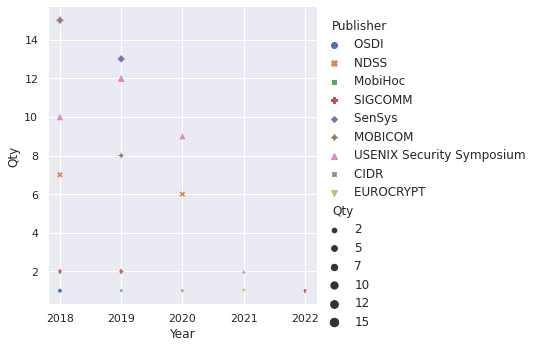

{'SOSP ': {2019: 2}, 'OSDI ': {2018: 3}, 'NDSS ': {2020: 8, 2019: 14, 2018: 7}, 'MobiHoc ': {2019: 2, 2018: 2}, 'SIGCOMM ': {2020: 2, 2019: 4, 2018: 3}, 'SenSys ': {2019: 4, 2018: 10}, 'MOBICOM ': {2020: 1, 2019: 11, 2018: 16}, 'CIDR ': {2020: 2, 2019: 6}, 'USENIX Security Symposium': {2021: 2, 2020: 4, 2019: 6, 2018: 4}}
      SOSP   OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
2019    2.0    0.0   14.0       2.0       4.0      4.0      11.0    6.0   
2018    0.0    3.0    7.0       2.0       3.0     10.0      16.0    0.0   
2020    0.0    0.0    8.0       0.0       2.0      0.0       1.0    2.0   
2021    0.0    0.0    0.0       0.0       0.0      0.0       0.0    0.0   

      USENIX Security Symposium  
2019                          6  
2018                          4  
2020                          4  
2021                          2  
[0. 0. 0. 0. 0. 0. 0. 0. 2.]
     SOSP   OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
sum    2.0    3.0   29.0   

[[2019, 'SOSP ', 2], [2019, 'NDSS ', 14], [2019, 'MobiHoc ', 2], [2019, 'SIGCOMM ', 4], [2019, 'SenSys ', 4], [2019, 'MOBICOM ', 11], [2019, 'CIDR ', 6], [2019, 'USENIX Security Symposium', 6], [2018, 'OSDI ', 3], [2018, 'NDSS ', 7], [2018, 'MobiHoc ', 2], [2018, 'SIGCOMM ', 3], [2018, 'SenSys ', 10], [2018, 'MOBICOM ', 16], [2018, 'USENIX Security Symposium', 4], [2020, 'NDSS ', 8], [2020, 'SIGCOMM ', 2], [2020, 'MOBICOM ', 1], [2020, 'CIDR ', 2], [2020, 'USENIX Security Symposium', 4], [2021, 'USENIX Security Symposium', 2]]


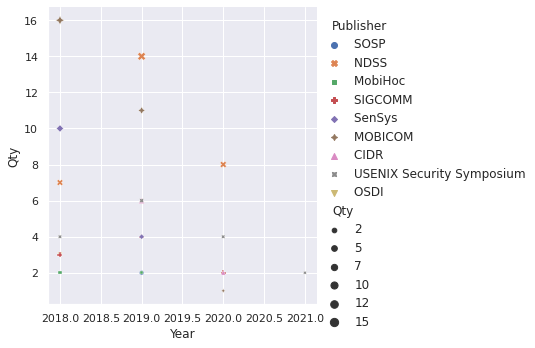

{'SOSP ': {2021: 2, 2019: 3}, 'OSDI ': {2018: 4}, 'NDSS ': {2020: 8, 2019: 7, 2018: 4}, 'MobiHoc ': {2021: 4, 2020: 4, 2019: 3, 2018: 1}, 'SIGCOMM ': {2020: 1, 2019: 1, 2018: 1}, 'SenSys ': {2019: 2, 2018: 6}, 'MOBICOM ': {2020: 2, 2019: 9, 2018: 4}, 'CIDR ': {2020: 6, 2019: 6}, 'USENIX Security Symposium': {2021: 1, 2020: 7, 2019: 15, 2018: 6}}
      SOSP   OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
2021    2.0    0.0    0.0         4       0.0      0.0       0.0    0.0   
2019    3.0    0.0    7.0         3       1.0      2.0       9.0    6.0   
2018    0.0    4.0    4.0         1       1.0      6.0       4.0    0.0   
2020    0.0    0.0    8.0         4       1.0      0.0       2.0    6.0   

      USENIX Security Symposium  
2021                          1  
2019                         15  
2018                          6  
2020                          7  
[2. 0. 0. 4. 0. 0. 0. 0. 1.]
     SOSP   OSDI   NDSS   MobiHoc   SIGCOMM   SenSys   MOBICOM   CIDR   \
sum

[[2021, 'SOSP ', 2], [2021, 'MobiHoc ', 4], [2021, 'USENIX Security Symposium', 1], [2019, 'SOSP ', 3], [2019, 'NDSS ', 7], [2019, 'MobiHoc ', 3], [2019, 'SIGCOMM ', 1], [2019, 'SenSys ', 2], [2019, 'MOBICOM ', 9], [2019, 'CIDR ', 6], [2019, 'USENIX Security Symposium', 15], [2018, 'OSDI ', 4], [2018, 'NDSS ', 4], [2018, 'MobiHoc ', 1], [2018, 'SIGCOMM ', 1], [2018, 'SenSys ', 6], [2018, 'MOBICOM ', 4], [2018, 'USENIX Security Symposium', 6], [2020, 'NDSS ', 8], [2020, 'MobiHoc ', 4], [2020, 'SIGCOMM ', 1], [2020, 'MOBICOM ', 2], [2020, 'CIDR ', 6], [2020, 'USENIX Security Symposium', 7]]


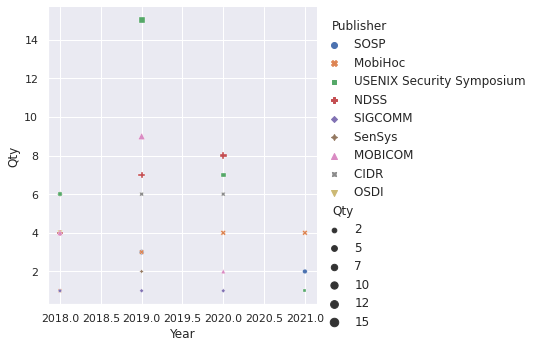

[92.0, 148.0, 337.0, 173.0, 235.0, 424.0, 427.0, 178.0, 641.0, 128.0]
{'Topic': ['SOFTWARE AND ITS ENGINEERING', 'SOFTWARE ORGANIZATION AND PROPERTIES', 'COMPUTER SYSTEMS ORGANIZATION', 'INFORMATION SYSTEMS', 'OPERATING SYSTEMS', 'CONTEXTUAL SOFTWARE DOMAINS'], 'Total': [38, 29, 29, 23, 18, 18], 'SOSP  Qty': [38.0, 29.0, 23.0, 21.0, 18.0, 18.0]}
                                  Topic  Total  SOSP  Qty
0          SOFTWARE AND ITS ENGINEERING     38       38.0
1  SOFTWARE ORGANIZATION AND PROPERTIES     29       29.0
2         COMPUTER SYSTEMS ORGANIZATION     29       23.0
3                   INFORMATION SYSTEMS     23       21.0
4                     OPERATING SYSTEMS     18       18.0
5           CONTEXTUAL SOFTWARE DOMAINS     18       18.0


[[2021, 'SOFTWARE AND ITS ENGINEERING', 24], [2021, 'SOFTWARE ORGANIZATION AND PROPERTIES', 19], [2021, 'COMPUTER SYSTEMS ORGANIZATION', 21], [2021, 'INFORMATION SYSTEMS', 16], [2021, 'OPERATING SYSTEMS', 11], [2021, 'CONTEXTUAL SOFTWARE DOMAINS', 11], [2019, 'SOFTWARE AND ITS ENGINEERING', 14], [2019, 'SOFTWARE ORGANIZATION AND PROPERTIES', 10], [2019, 'COMPUTER SYSTEMS ORGANIZATION', 2], [2019, 'INFORMATION SYSTEMS', 5], [2019, 'OPERATING SYSTEMS', 7], [2019, 'CONTEXTUAL SOFTWARE DOMAINS', 7]]


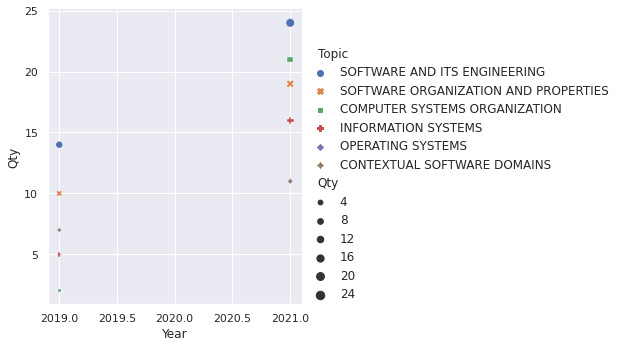

{'Topic': ['COMPUTER SCIENCE', 'SERVER (COMPUTING)', 'THROUGHPUT', 'CENTRAL PROCESSING UNIT', 'DISTRIBUTED COMPUTING', 'COMPUTATION'], 'Total': [131, 84, 77, 63, 22, 78], 'OSDI  Qty': [19.0, 9.0, 9.0, 8.0, 7.0, 7.0]}
                     Topic  Total  OSDI  Qty
0         COMPUTER SCIENCE    131       19.0
1       SERVER (COMPUTING)     84        9.0
2               THROUGHPUT     77        9.0
3  CENTRAL PROCESSING UNIT     63        8.0
4    DISTRIBUTED COMPUTING     22        7.0
5              COMPUTATION     78        7.0


[[2021, 'COMPUTER SCIENCE', 2], [2020, 'COMPUTER SCIENCE', 11], [2018, 'COMPUTER SCIENCE', 6], [2018, 'SERVER (COMPUTING)', 9], [2018, 'THROUGHPUT', 9], [2018, 'CENTRAL PROCESSING UNIT', 8], [2018, 'DISTRIBUTED COMPUTING', 7], [2018, 'COMPUTATION', 7]]


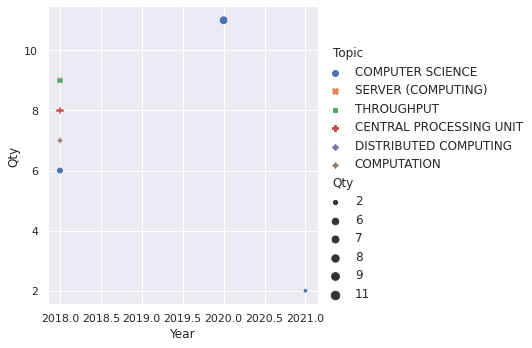

{'Topic': ['OVERHEAD (COMPUTING)', 'ADVERSARY (CRYPTOGRAPHY)', 'EXPERIMENT', 'MALWARE', 'PROTOTYPE', 'COMPUTER SCIENCE'], 'Total': [105, 80, 154, 61, 113, 131], 'NDSS  Qty': [43.0, 32.0, 31.0, 30.0, 29.0, 25.0]}
                      Topic  Total  NDSS  Qty
0      OVERHEAD (COMPUTING)    105       43.0
1  ADVERSARY (CRYPTOGRAPHY)     80       32.0
2                EXPERIMENT    154       31.0
3                   MALWARE     61       30.0
4                 PROTOTYPE    113       29.0
5          COMPUTER SCIENCE    131       25.0


[[2021, 'ADVERSARY (CRYPTOGRAPHY)', 1], [2021, 'EXPERIMENT', 2], [2021, 'COMPUTER SCIENCE', 4], [2020, 'OVERHEAD (COMPUTING)', 12], [2020, 'ADVERSARY (CRYPTOGRAPHY)', 12], [2020, 'EXPERIMENT', 14], [2020, 'MALWARE', 8], [2020, 'PROTOTYPE', 8], [2020, 'COMPUTER SCIENCE', 11], [2019, 'OVERHEAD (COMPUTING)', 9], [2019, 'ADVERSARY (CRYPTOGRAPHY)', 11], [2019, 'EXPERIMENT', 10], [2019, 'MALWARE', 13], [2019, 'PROTOTYPE', 14], [2019, 'COMPUTER SCIENCE', 6], [2018, 'OVERHEAD (COMPUTING)', 22], [2018, 'ADVERSARY (CRYPTOGRAPHY)', 8], [2018, 'EXPERIMENT', 5], [2018, 'MALWARE', 9], [2018, 'PROTOTYPE', 7], [2018, 'COMPUTER SCIENCE', 4]]


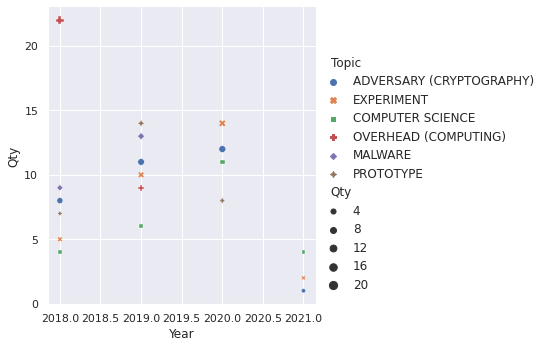

{'Topic': ['NETWORKS', 'NETWORK PERFORMANCE EVALUATION', 'NETWORK TYPES', 'SIMULATION', 'NETWORK PERFORMANCE ANALYSIS', 'NETWORK ALGORITHMS'], 'Total': [74, 33, 32, 71, 21, 22], 'MobiHoc  Qty': [64.0, 31.0, 28.0, 25.0, 21.0, 21.0]}
                            Topic  Total  MobiHoc  Qty
0                        NETWORKS     74          64.0
1  NETWORK PERFORMANCE EVALUATION     33          31.0
2                   NETWORK TYPES     32          28.0
3                      SIMULATION     71          25.0
4    NETWORK PERFORMANCE ANALYSIS     21          21.0
5              NETWORK ALGORITHMS     22          21.0


[[2021, 'NETWORKS', 22], [2021, 'NETWORK PERFORMANCE EVALUATION', 13], [2021, 'NETWORK TYPES', 6], [2021, 'NETWORK PERFORMANCE ANALYSIS', 11], [2021, 'NETWORK ALGORITHMS', 3], [2020, 'NETWORKS', 31], [2020, 'NETWORK PERFORMANCE EVALUATION', 11], [2020, 'NETWORK TYPES', 15], [2020, 'SIMULATION', 1], [2020, 'NETWORK PERFORMANCE ANALYSIS', 6], [2020, 'NETWORK ALGORITHMS', 11], [2019, 'NETWORKS', 11], [2019, 'NETWORK PERFORMANCE EVALUATION', 7], [2019, 'NETWORK TYPES', 7], [2019, 'SIMULATION', 11], [2019, 'NETWORK PERFORMANCE ANALYSIS', 4], [2019, 'NETWORK ALGORITHMS', 7], [2018, 'SIMULATION', 13]]


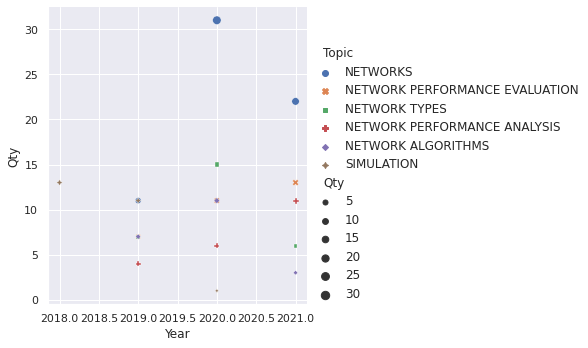

{'Topic': ['ALGORITHM', 'NETWORK PACKET', 'THROUGHPUT', 'NETWORK CONGESTION', 'EXPERIMENT', 'SOFTWARE DEPLOYMENT'], 'Total': [150, 60, 77, 25, 154, 77], 'SIGCOMM  Qty': [21.0, 18.0, 13.0, 12.0, 11.0, 10.0]}
                 Topic  Total  SIGCOMM  Qty
0            ALGORITHM    150          21.0
1       NETWORK PACKET     60          18.0
2           THROUGHPUT     77          13.0
3   NETWORK CONGESTION     25          12.0
4           EXPERIMENT    154          11.0
5  SOFTWARE DEPLOYMENT     77          10.0


[[2022, 'ALGORITHM', 1], [2022, 'THROUGHPUT', 1], [2022, 'NETWORK CONGESTION', 1], [2022, 'EXPERIMENT', 1], [2020, 'ALGORITHM', 5], [2020, 'NETWORK PACKET', 6], [2020, 'THROUGHPUT', 8], [2020, 'NETWORK CONGESTION', 3], [2020, 'EXPERIMENT', 3], [2020, 'SOFTWARE DEPLOYMENT', 4], [2019, 'ALGORITHM', 6], [2019, 'NETWORK PACKET', 5], [2019, 'THROUGHPUT', 2], [2019, 'NETWORK CONGESTION', 1], [2019, 'EXPERIMENT', 4], [2019, 'SOFTWARE DEPLOYMENT', 4], [2018, 'ALGORITHM', 9], [2018, 'NETWORK PACKET', 7], [2018, 'THROUGHPUT', 2], [2018, 'NETWORK CONGESTION', 7], [2018, 'EXPERIMENT', 3], [2018, 'SOFTWARE DEPLOYMENT', 2]]


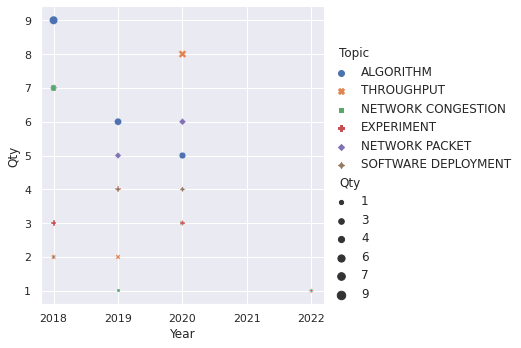

{'Topic': ['SENSOR', 'EXPERIMENT', 'SOFTWARE DEPLOYMENT', 'PROTOTYPE', 'REAL-TIME CLOCK', 'SMARTPHONE'], 'Total': [114, 154, 77, 113, 40, 59], 'SenSys  Qty': [28.0, 16.0, 15.0, 14.0, 13.0, 13.0]}
                 Topic  Total  SenSys  Qty
0               SENSOR    114         28.0
1           EXPERIMENT    154         16.0
2  SOFTWARE DEPLOYMENT     77         15.0
3            PROTOTYPE    113         14.0
4      REAL-TIME CLOCK     40         13.0
5           SMARTPHONE     59         13.0


[[2019, 'SENSOR', 13], [2019, 'EXPERIMENT', 4], [2019, 'SOFTWARE DEPLOYMENT', 9], [2019, 'PROTOTYPE', 4], [2019, 'REAL-TIME CLOCK', 6], [2019, 'SMARTPHONE', 7], [2018, 'SENSOR', 15], [2018, 'EXPERIMENT', 12], [2018, 'SOFTWARE DEPLOYMENT', 6], [2018, 'PROTOTYPE', 10], [2018, 'REAL-TIME CLOCK', 7], [2018, 'SMARTPHONE', 6]]


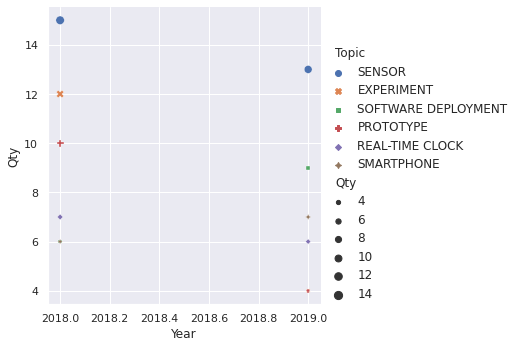

{'Topic': ['EXPERIMENT', 'PROTOTYPE', 'ALGORITHM', 'SENSOR', 'SMARTPHONE', 'THROUGHPUT'], 'Total': [154, 113, 150, 114, 59, 77], 'MOBICOM  Qty': [31.0, 28.0, 26.0, 24.0, 22.0, 20.0]}
        Topic  Total  MOBICOM  Qty
0  EXPERIMENT    154          31.0
1   PROTOTYPE    113          28.0
2   ALGORITHM    150          26.0
3      SENSOR    114          24.0
4  SMARTPHONE     59          22.0
5  THROUGHPUT     77          20.0


[[2020, 'EXPERIMENT', 4], [2020, 'PROTOTYPE', 1], [2020, 'ALGORITHM', 3], [2020, 'SENSOR', 1], [2020, 'SMARTPHONE', 1], [2019, 'EXPERIMENT', 13], [2019, 'PROTOTYPE', 11], [2019, 'ALGORITHM', 14], [2019, 'SENSOR', 8], [2019, 'SMARTPHONE', 9], [2019, 'THROUGHPUT', 9], [2018, 'EXPERIMENT', 14], [2018, 'PROTOTYPE', 16], [2018, 'ALGORITHM', 9], [2018, 'SENSOR', 15], [2018, 'SMARTPHONE', 12], [2018, 'THROUGHPUT', 11]]


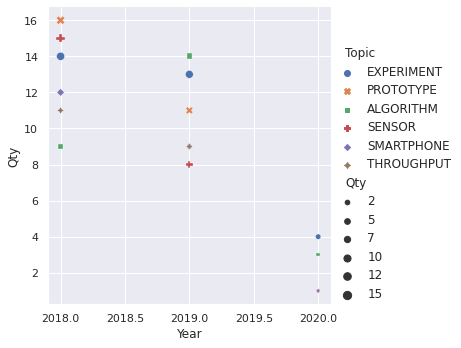

{'Topic': ['COMPUTER SCIENCE', 'DATABASE', 'MATHEMATICAL OPTIMIZATION', 'MACHINE LEARNING', 'QUERY OPTIMIZATION', 'PROTOTYPE'], 'Total': [131, 31, 73, 107, 10, 113], 'CIDR  Qty': [24.0, 22.0, 15.0, 12.0, 9.0, 8.0]}
                       Topic  Total  CIDR  Qty
0           COMPUTER SCIENCE    131       24.0
1                   DATABASE     31       22.0
2  MATHEMATICAL OPTIMIZATION     73       15.0
3           MACHINE LEARNING    107       12.0
4         QUERY OPTIMIZATION     10        9.0
5                  PROTOTYPE    113        8.0


[[2022, 'COMPUTER SCIENCE', 6], [2021, 'COMPUTER SCIENCE', 9], [2020, 'COMPUTER SCIENCE', 6], [2020, 'DATABASE', 10], [2020, 'MATHEMATICAL OPTIMIZATION', 6], [2020, 'MACHINE LEARNING', 6], [2020, 'QUERY OPTIMIZATION', 4], [2020, 'PROTOTYPE', 2], [2019, 'COMPUTER SCIENCE', 3], [2019, 'DATABASE', 12], [2019, 'MATHEMATICAL OPTIMIZATION', 9], [2019, 'MACHINE LEARNING', 6], [2019, 'QUERY OPTIMIZATION', 5], [2019, 'PROTOTYPE', 6]]


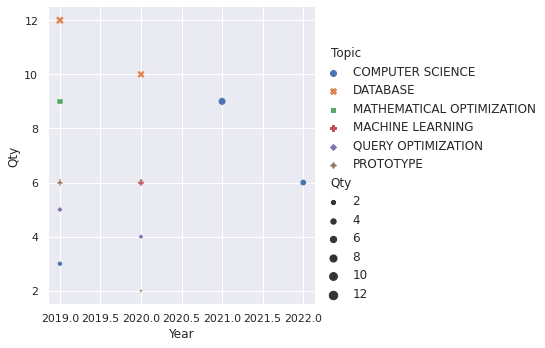

{'Topic': ['COMPUTER SCIENCE', 'EXPERIMENT', 'ALGORITHM', 'SENSOR', 'OVERHEAD (COMPUTING)', 'VULNERABILITY (COMPUTING)'], 'Total': [131, 154, 150, 114, 105, 50], 'USENIX Security Symposium Qty': [56.0, 38.0, 33.0, 33.0, 31.0, 31.0]}
                       Topic  Total  USENIX Security Symposium Qty
0           COMPUTER SCIENCE    131                           56.0
1                 EXPERIMENT    154                           38.0
2                  ALGORITHM    150                           33.0
3                     SENSOR    114                           33.0
4       OVERHEAD (COMPUTING)    105                           31.0
5  VULNERABILITY (COMPUTING)     50                           31.0


[[2021, 'COMPUTER SCIENCE', 22], [2021, 'SENSOR', 2], [2021, 'OVERHEAD (COMPUTING)', 4], [2021, 'VULNERABILITY (COMPUTING)', 2], [2020, 'COMPUTER SCIENCE', 13], [2020, 'EXPERIMENT', 9], [2020, 'ALGORITHM', 11], [2020, 'SENSOR', 9], [2020, 'OVERHEAD (COMPUTING)', 8], [2020, 'VULNERABILITY (COMPUTING)', 7], [2019, 'COMPUTER SCIENCE', 12], [2019, 'EXPERIMENT', 16], [2019, 'ALGORITHM', 15], [2019, 'SENSOR', 12], [2019, 'OVERHEAD (COMPUTING)', 11], [2019, 'VULNERABILITY (COMPUTING)', 14], [2018, 'COMPUTER SCIENCE', 9], [2018, 'EXPERIMENT', 13], [2018, 'ALGORITHM', 7], [2018, 'SENSOR', 10], [2018, 'OVERHEAD (COMPUTING)', 8], [2018, 'VULNERABILITY (COMPUTING)', 8]]


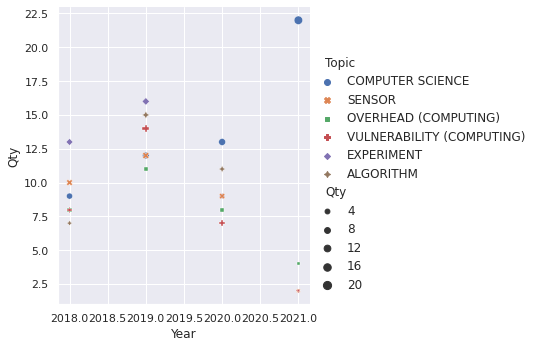

{'Topic': ['CRYPTOGRAPHY', 'TIME COMPLEXITY', 'COMPUTATION', 'ALGORITHM', 'IBM NOTES', 'POLYNOMIAL'], 'Total': [66, 44, 78, 150, 44, 17], 'EUROCRYPT  Qty': [22.0, 13.0, 13.0, 11.0, 9.0, 9.0]}
             Topic  Total  EUROCRYPT  Qty
0     CRYPTOGRAPHY     66            22.0
1  TIME COMPLEXITY     44            13.0
2      COMPUTATION     78            13.0
3        ALGORITHM    150            11.0
4        IBM NOTES     44             9.0
5       POLYNOMIAL     17             9.0


[[2021, 'CRYPTOGRAPHY', 1], [2021, 'ALGORITHM', 2], [2020, 'CRYPTOGRAPHY', 6], [2020, 'TIME COMPLEXITY', 4], [2020, 'COMPUTATION', 5], [2020, 'ALGORITHM', 2], [2020, 'IBM NOTES', 2], [2020, 'POLYNOMIAL', 1], [2019, 'CRYPTOGRAPHY', 7], [2019, 'TIME COMPLEXITY', 2], [2019, 'COMPUTATION', 2], [2019, 'ALGORITHM', 3], [2019, 'IBM NOTES', 3], [2019, 'POLYNOMIAL', 2], [2018, 'CRYPTOGRAPHY', 8], [2018, 'TIME COMPLEXITY', 7], [2018, 'COMPUTATION', 6], [2018, 'ALGORITHM', 4], [2018, 'IBM NOTES', 4], [2018, 'POLYNOMIAL', 6]]


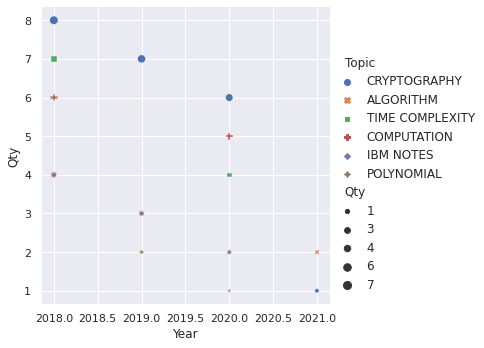

document
  prefix cornel <https://www.cs.cornell.edu/andru/>
  prefix dblp <https://dblp.org/>
  prefix ufrj <https://www.ufrj.br>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  agent(ufrj:UFRJ, [prov:type="prov:Organization", foaf:name="Universidade Federal do Rio de Janeiro"])
  agent(ufrj:PPGI, [prov:type="prov:Organization", foaf:name="Programa de Pós Graduação em Informática"])
  actedOnBehalfOf(ufrj:PPGI, ufrj:UFRJ, -)
  agent(ufrj:MAI712, [prov:type="prov:Organization", foaf:name="Disciplina de Fundamentos de Ciências de Dados"])
  actedOnBehalfOf(ufrj:MAI712, ufrj:PPGI, -)
  agent(ufrj:GRUPO6, [prov:type="prov:Organization", foaf:name="Grupo 06 para o trabalho final"])
  actedOnBehalfOf(ufrj:GRUPO6, ufrj:MAI712, -)
  agent(ufrj:Ingrid, [prov:type="foaf:Person", foaf:name="Ingrid Quintanilha Pacheco", foaf:mbox="ingrid.pacheco@dcc.ufrj.br"])
  actedOnBehalfOf(ufrj:Ingrid, ufrj:GRUPO6, -)
  agent(ufrj:Eduardo, [prov:type="foaf:Person", foaf:name="Eduardo Prata", foaf:mbox="edu.p

In [27]:
d1 = ProvDocument()

d1.add_namespace('cornel', 'https://www.cs.cornell.edu/andru/')
d1.add_namespace('dblp', 'https://dblp.org/')
d1.add_namespace('ufrj', 'https://www.ufrj.br')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')

dagnts = {}
dentities = {}
dactivities = {}
create_agents(d1,dagnts)

dentities['et-dataset'] = d1.entity(f'ufrj:articles-2022-09-19.csv', {'prov:label': 'CSV de dataset com os dados dos artigos', 'prov:type': 'foaf:Document'})
start_time = datetime.datetime.now()

urllib.request.urlretrieve('https://drive.google.com/uc?id=1kWTbqT4QXZ2cVIP5dIHbgVI6ipRc3ba1&authuser=0&export=download', 'articles-2022-09-19.csv')
os.listdir()

article_data = pd.read_csv('articles-2022-09-19.csv',sep = ';')
article_data.head()
main(article_data)

end_time = datetime.datetime.now()
dactivities["at-analisar-artigos"] = d1.activity("ufrj:analisar-artigos", start_time, end_time)
d1.used(dactivities["at-analisar-artigos"], dentities['et-dataset'])
d1.wasAssociatedWith(dactivities["at-analisar-artigos"], dagnts["ag-grupo6"])

print(d1.get_provn())
dot = prov_to_dot(d1)
dot.write_png('./articleAnalysis-prov.png')
Image('./articleAnalysis-prov.png')